## Student Performance Indicator

### Life cycle of Machine learning Project

1. Understanding the Problem Statement
2. Data Collection
3. Data Checks to perform
4. Exploratory data analysis
5. Data Pre-Processing
6. Model Training 
7. Choose best model

### 1. Problem Statement
This project understands how the student's performance(test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

### 2. Data Collection 
Data Source - https://www.kaggle.com/datasets/rdeb26/stud-csv (The data consists of 8 columns and 1000 rows.)

### 2.1 Import Data and Required Packages
Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

Import the CSV Data as Pandas DatFrame

In [2]:
df = pd.read_csv('data/stud.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Shape of Dataset

In [4]:
df.shape

(1000, 8)

### 2.2 Dataset Information
Gender: Sex of students
→ Values: Male, Female

Race/Ethnicity: Ethnic background of students
→ Values: Group A, Group B, Group C, Group D, Group E

Parental Level of Education: Highest education level attained by parents
→ Values:
    • Bachelor's degree
    • Some college
    • Master's degree
    • Associate's degree
    • High school

Lunch: Type of lunch before the test
→ Values: Standard, Free/Reduced

Test Preparation Course: Whether a test prep course was completed
→ Values: Completed, Not completed

Math Score: Score obtained in the math section (numeric)

Reading Score: Score obtained in the reading section (numeric)

Writing Score: Score obtained in the writing section (numeric)

### 3. Data Checks to perform

#### 3.1 Check Missing Values

In [5]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [6]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

#### 3.2 Check Duplicates

In [7]:
df.duplicated().sum()

0

#### 3.3 Check Datatypes

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### 3.4 Checking the number of unique values of each columns

In [9]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

#### 3.5 Check the statistics of dataset

In [10]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### 3.6 Exploring Data

In [17]:
print("Categories in 'gender' variable: ", end = " ")
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable: ", end = " ")
print(df['race_ethnicity'].unique())

print("Categories in 'parental level of education' variable: ", end = " ")
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable: ", end = " ")
print(df['lunch'].unique())

print("Categories in 'test_preparation_course' variable: ", end = " ")
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:  ['female' 'male']
Categories in 'race/ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:  ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable:  ['none' 'completed']


In [18]:
## defing numerical and categorical features
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O'] 
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O'] 

## print columns
print('We have {} numerical features: {}'.format(len(numeric_features), numeric_features))
print('We have {} categorical features: {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features: ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


#### 3.7 Adding columns for 'Total Score' and 'Average'

In [19]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score'] / 3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [21]:
reading_full = (df['reading_score'] == 100).sum()
writing_full = (df['writing_score'] == 100).sum()
math_full = (df['math_score'] == 100).sum()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [23]:
reading_less_20 = (df['reading_score'] <= 20).sum()
writing_less_20 = (df['writing_score'] <= 20).sum()
math_less_20 = (df['math_score'] <= 20).sum()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


## 4. Exploring Data(Visualization)

4.1 Visualize average score distribution to make some conclusion.
-> Histogram & KDE(Kernal Distribution Function)

### 4.1.1 Histogran and KDE

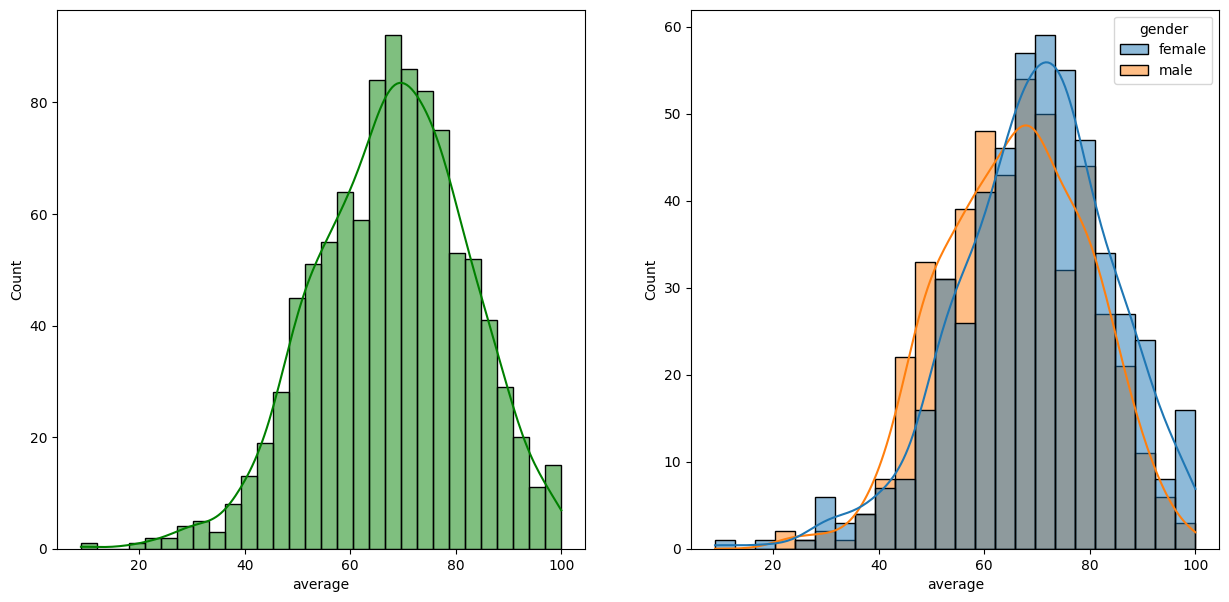

In [24]:
fig, axs = plt.subplots(1, 2, figsize = (15, 7))
plt.subplot(121)
sns.histplot(data = df, x = 'average', bins = 30, kde = True, color = 'g')
plt.subplot(122)
sns.histplot(data = df, x = 'average', kde = True, hue = 'gender')
plt.show()

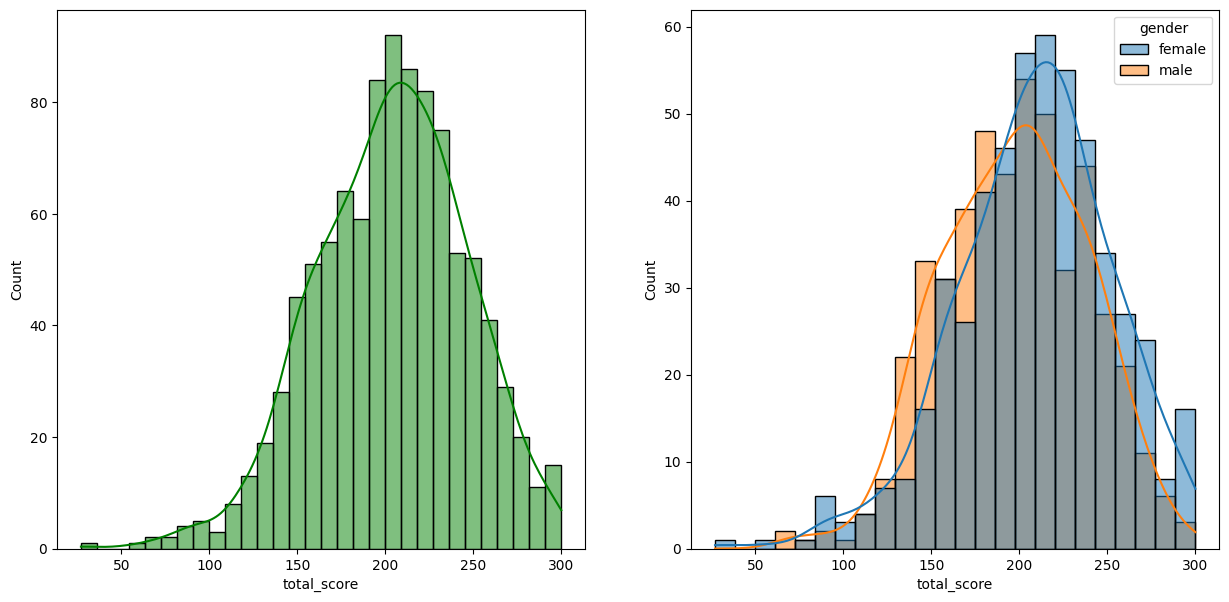

In [25]:
fig, axs = plt.subplots(1, 2, figsize = (15, 7))
plt.subplot(121)
sns.histplot(data = df, x = 'total_score', bins = 30, kde = True, color = 'g')
plt.subplot(122)
sns.histplot(data = df, x = 'total_score', kde = True, hue = 'gender')
plt.show()

##### Insights
Female students tend to perform well then male studens according to above visualizations.

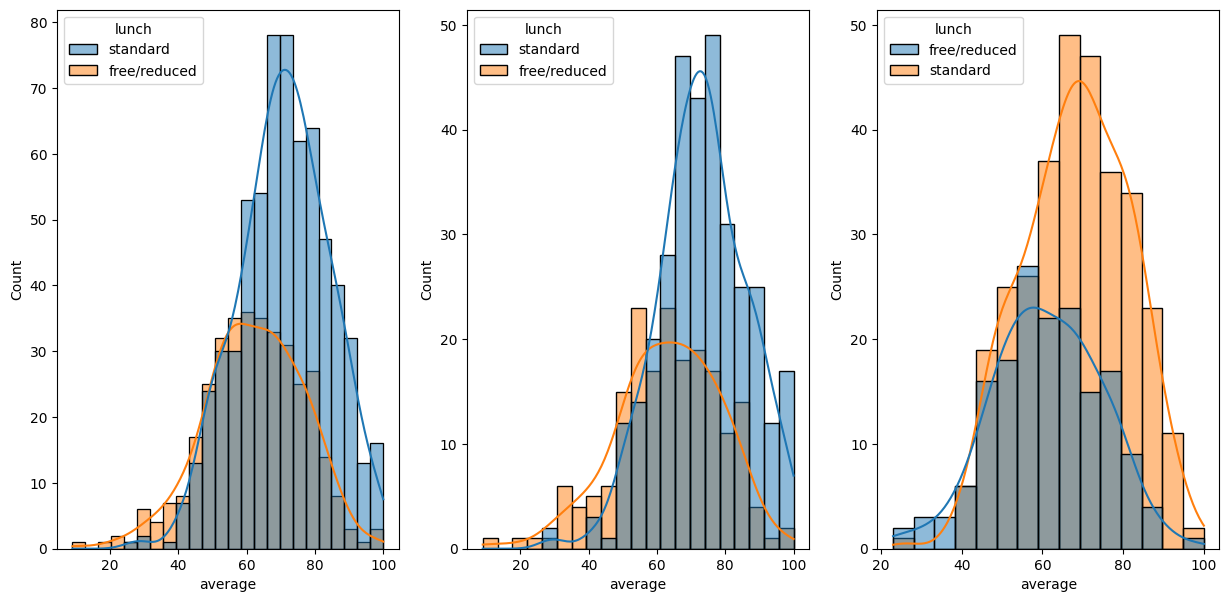

In [48]:
## Histogram and KDE plot of 'Lunch' column
fig, axs = plt.subplots(1, 3, figsize = (15, 7))
plt.subplot(131)
sns.histplot(data = df, x = 'average', kde = True, hue = 'lunch')
plt.subplot(132)
sns.histplot(data = df[df.gender == 'female'], x = 'average', kde = True, hue = 'lunch')
plt.subplot(133)
sns.histplot(data = df[df.gender == 'male'], x = 'average', kde = True, hue = 'lunch')
plt.show()

#### Insights
Standard lunch helps perform well in exams be it a male or female.

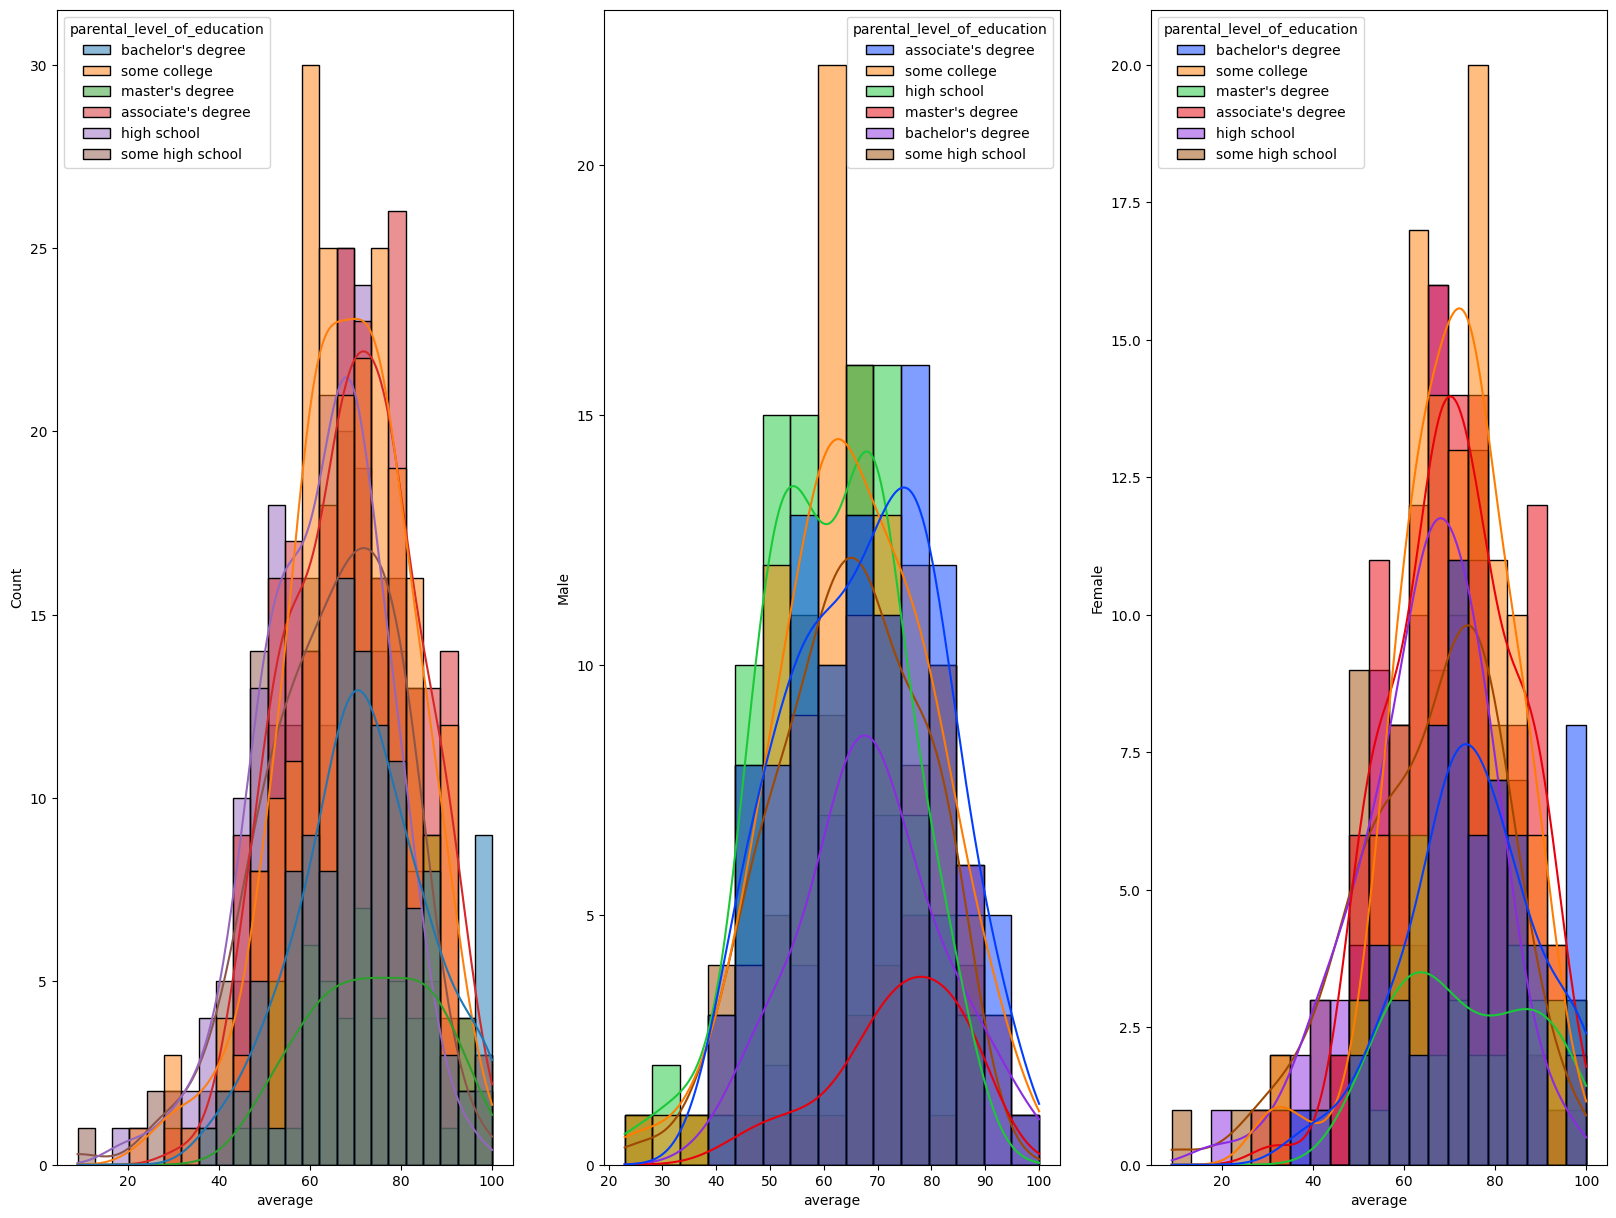

In [55]:
## Histogram and KDE plot of 'Parental Level of Education' column
fig, axs = plt.subplots(1, 3, figsize = (20, 15))
plt.subplot(131)
sns.histplot(data = df, x = 'average', kde = True, hue = 'parental_level_of_education')
plt.subplot(132)
sns.histplot(data = df[df.gender == 'male'], x = 'average', kde = True, hue = 'parental_level_of_education', palette = 'bright')
plt.ylabel('Male')
plt.subplot(133)
sns.histplot(data = df[df.gender == 'female'], x = 'average', kde = True, hue = 'parental_level_of_education', palette = 'bright')
plt.ylabel('Female')
plt.show()

#### Insights
1. 2nd plot shows that parent's education is of associate's degree or master's degree their male chil tend to perform well in exam.
2. 3rd plot we can see there is no effect of parent's education on female students.

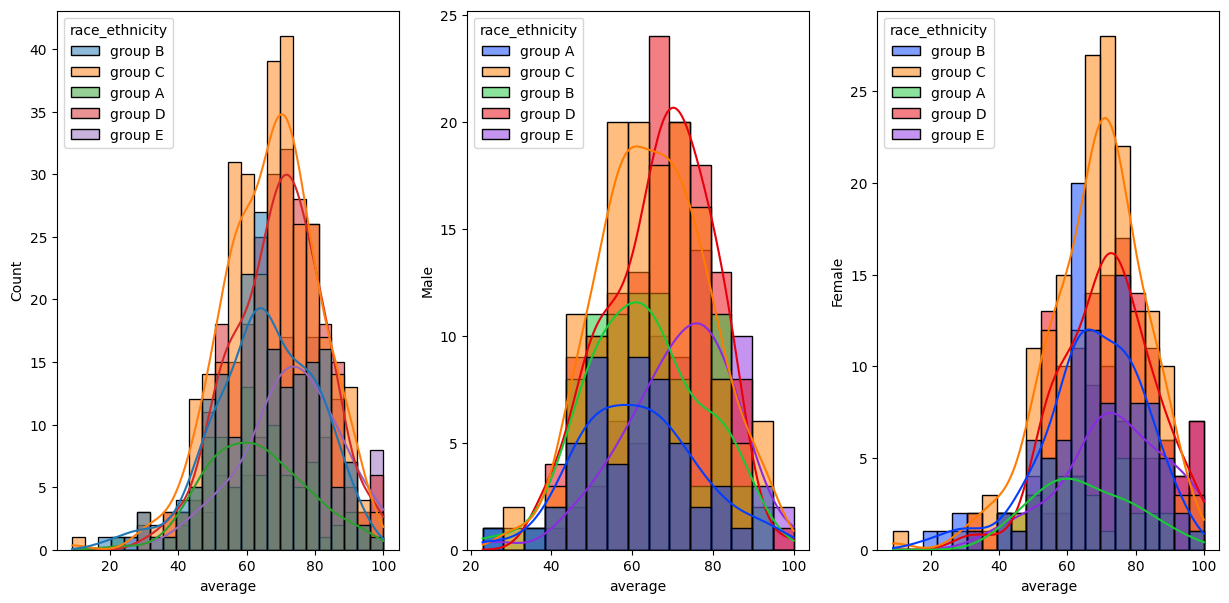

In [57]:
fig, axs = plt.subplots(1, 3, figsize = (15, 7))
plt.subplot(131)
sns.histplot(data = df, x = 'average', kde = True, hue = 'race_ethnicity')
plt.subplot(132)
sns.histplot(data = df[df.gender == 'male'], x = 'average', kde = True, hue = 'race_ethnicity', palette = 'bright')
plt.ylabel('Male')
plt.subplot(133)
sns.histplot(data = df[df.gender == 'female'], x = 'average', kde = True, hue = 'race_ethnicity', palette = 'bright')
plt.ylabel('Female')
plt.show()

### 4.3 Multivariant analysis using pieplot

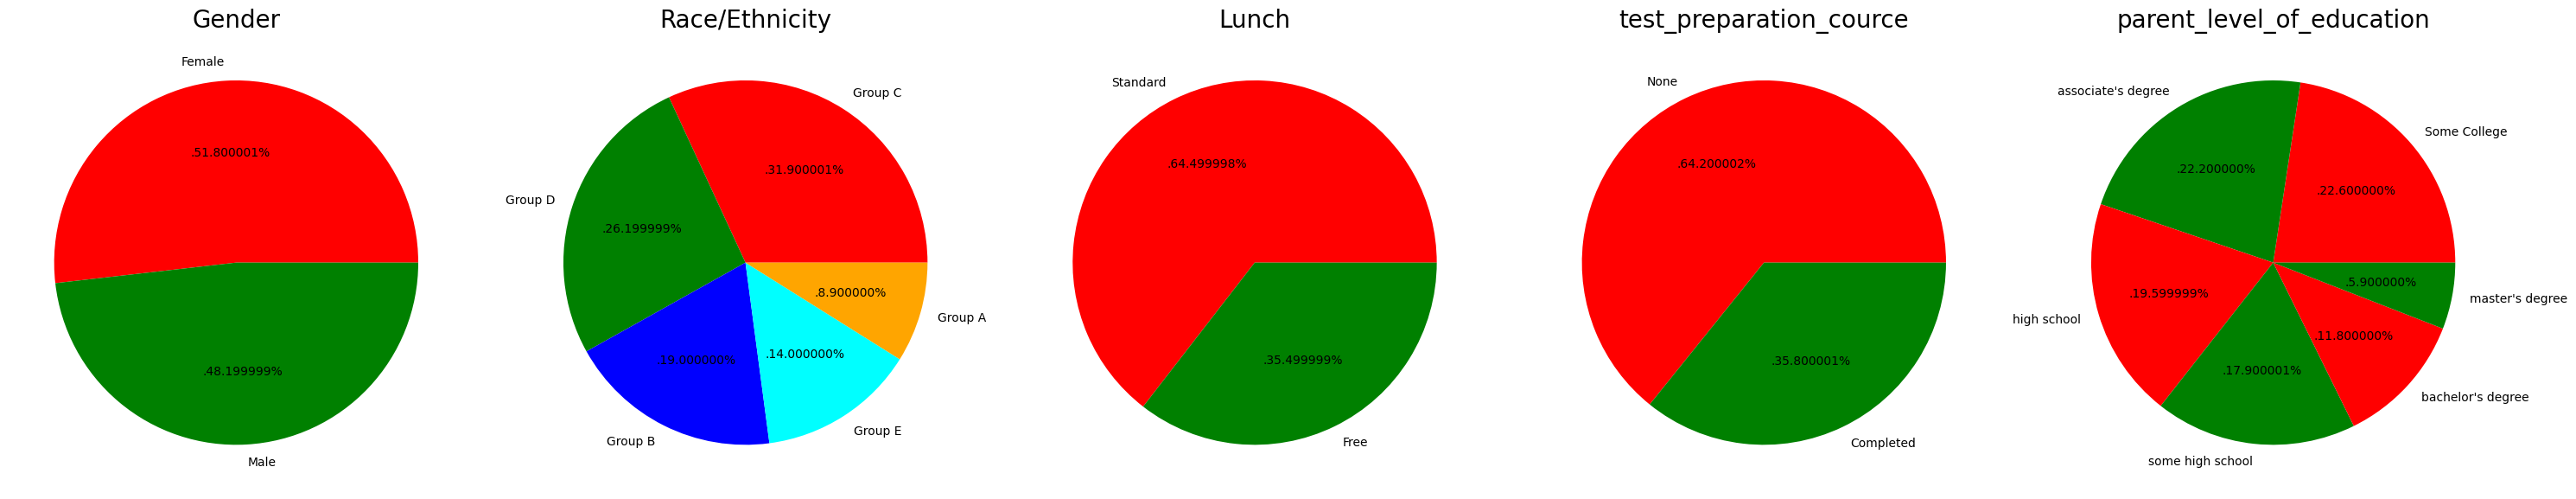

In [44]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red', 'green']

plt.pie(size, colors = color, labels = labels, autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D', 'Group B', 'Group E', 'Group A' 
color = ['red', 'green', 'blue', 'cyan', 'orange']

plt.pie(size, colors = color, labels = labels, autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red', 'green']

plt.pie(size, colors = color, labels = labels, autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red', 'green']

plt.pie(size, colors = color, labels = labels, autopct = '.%2f%%')
plt.title('test_preparation_cource', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "associate's degree", 'high school', 'some high school', "bachelor's degree", "master's degree"
color = ['red', 'green']

plt.pie(size, colors = color, labels = labels, autopct = '.%2f%%')
plt.title('parent_level_of_education', fontsize = 20)
plt.axis('off')

plt.tight_layout()
plt.grid()
plt.show()

#### Insights

1. Number of Male and Female students is almost equal

2. Number students are greatest in Group C

3. Number of students who have standard lunch are greater

4. Number of students who have not enrolled in any test preparation course is greater

5. Number of students whose parental education is "Some College" is greater followed closely by "Associate

## 4.4 Feature Wise Visualization

### 4.4.1 Gender Column
1. How gender is distributed?
2. Is gender has any impact on student's performance?

UNIVARIATE ANALYSIS(How gender is distributed?)

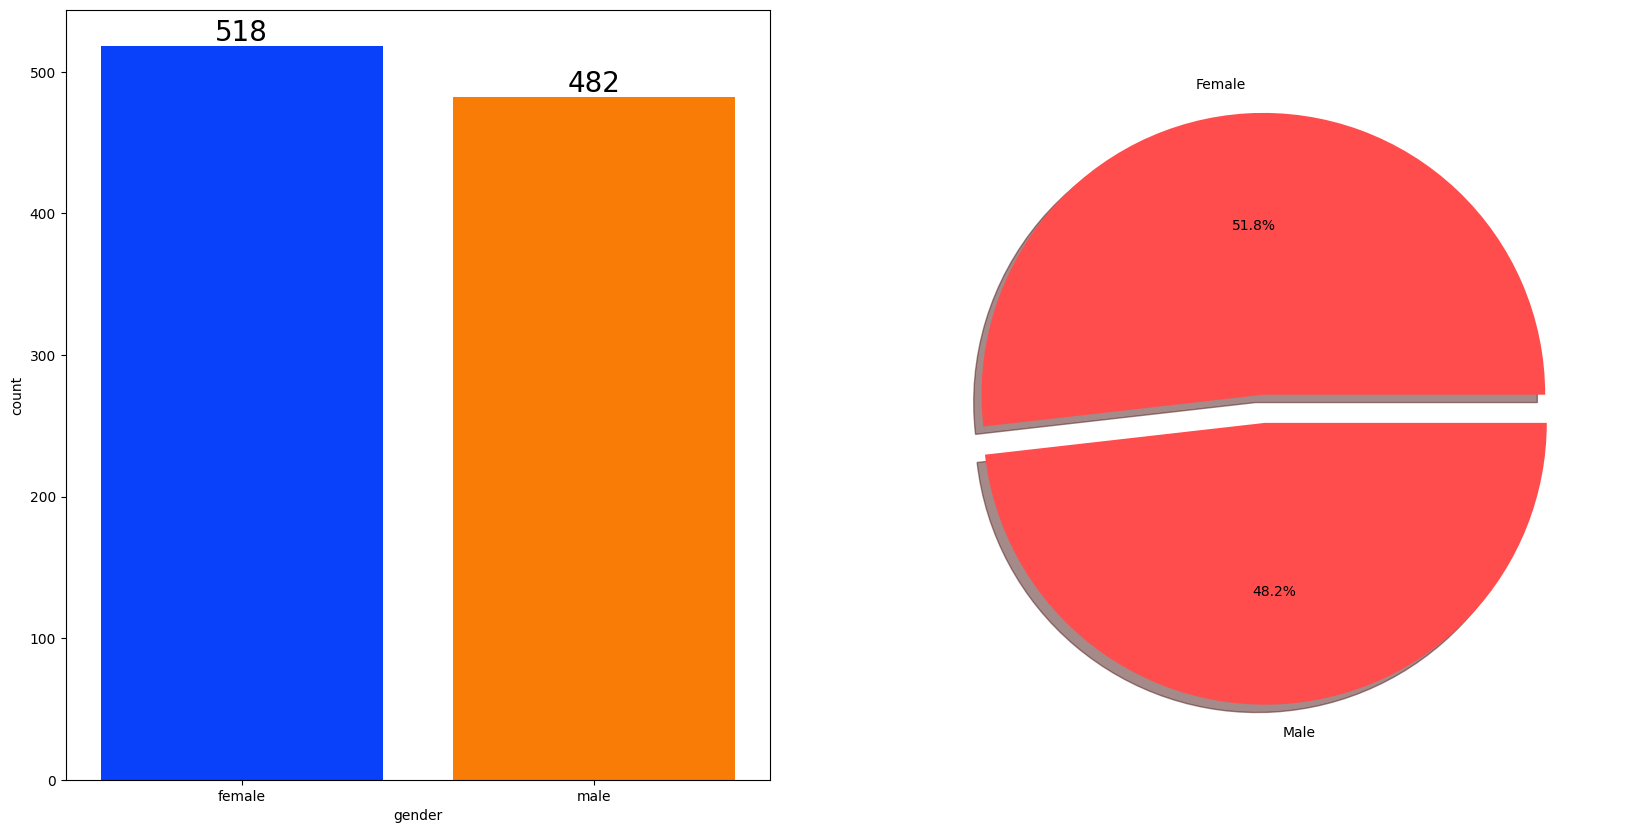

In [58]:
f, ax = plt.subplots(1, 2, figsize = (20, 10))
sns.countplot(x = df['gender'], data = df, palette = 'bright', ax = ax[0], saturation = 0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color = 'black', size = 20)

ax[1].pie(x = df['gender'].value_counts(), labels = ['Female', 'Male'], explode = [0, 0.1], autopct = '%1.1f%%', shadow = True, colors = ['#ff4d4d'])
plt.show()

#### Insights
Gender has balanced data with female students are 518(48%) and male students are 482(52%) according to above visualization.

BIVARIATE ANALYSIS(Is gender has any impact on student's performance?)

In [ ]:
gender_group = df.groupby('gender').mean(numeric_only = True)
gender_group

,math_score,reading_score,writing_score,total_score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


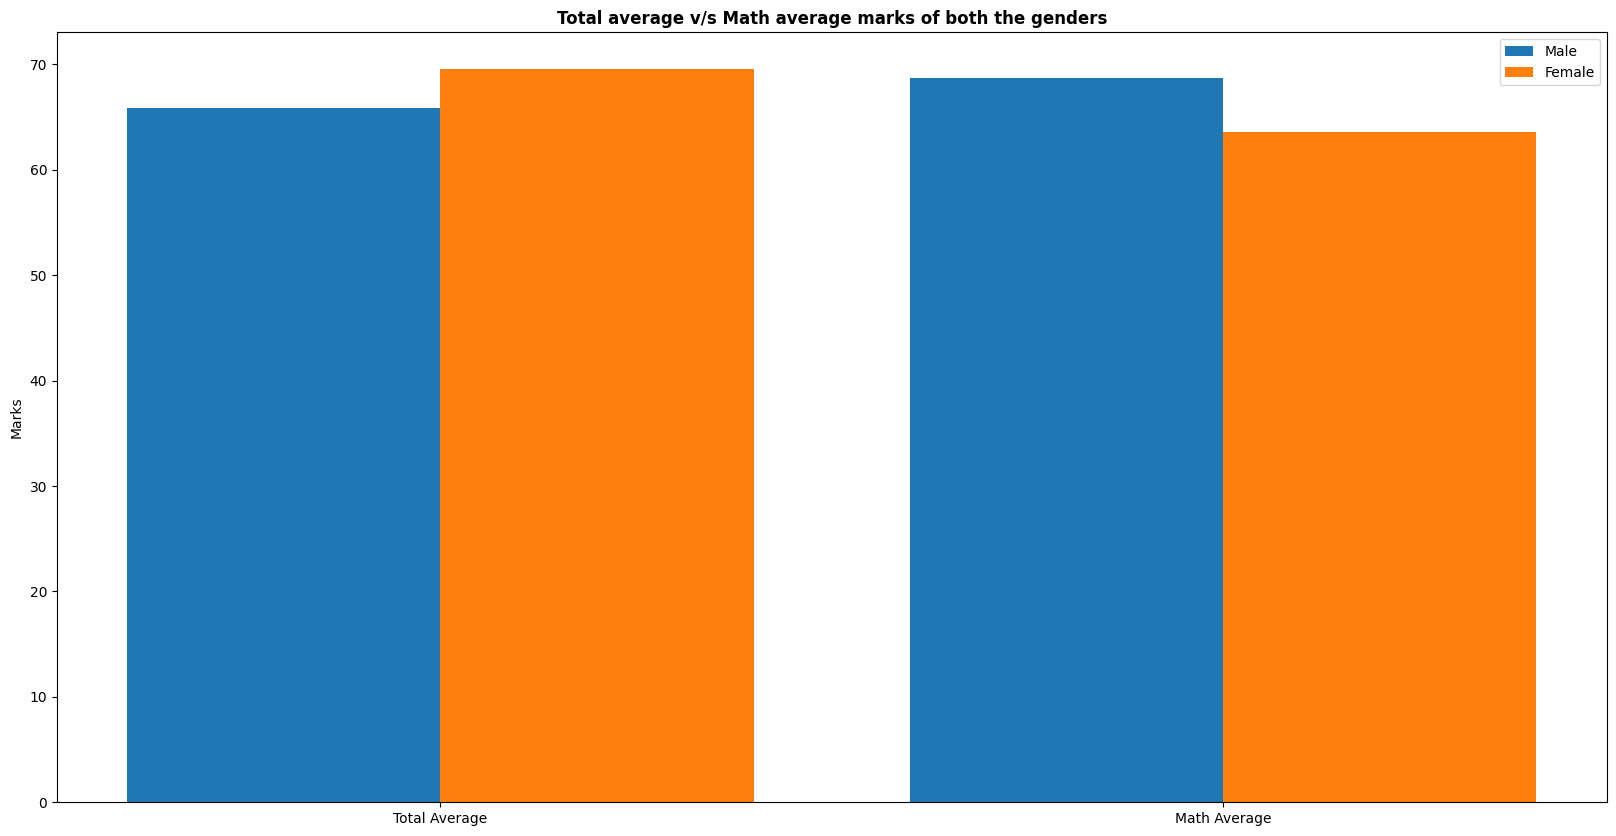

In [63]:
plt.figure(figsize = (20, 10))

X = ['Total Average', 'Math Average']

female_score = [gender_group['average'][0], gender_group['math_score'][0]]
male_score = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male_score, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_score, 0.4, label = 'Female')


plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight = 'bold')
plt.legend()
plt.show()

#### Insights
1. On an average females have a better overall score than men.
2. Where as males have scored higher in maths.

### 4.4.2 Race/Ethnicity Column
1. How is group wise distribution?
2. Is Race/Ethnicity has any impact on student's performance?

UNIVARIATE ANALYSIS(How is group wise distribution?)

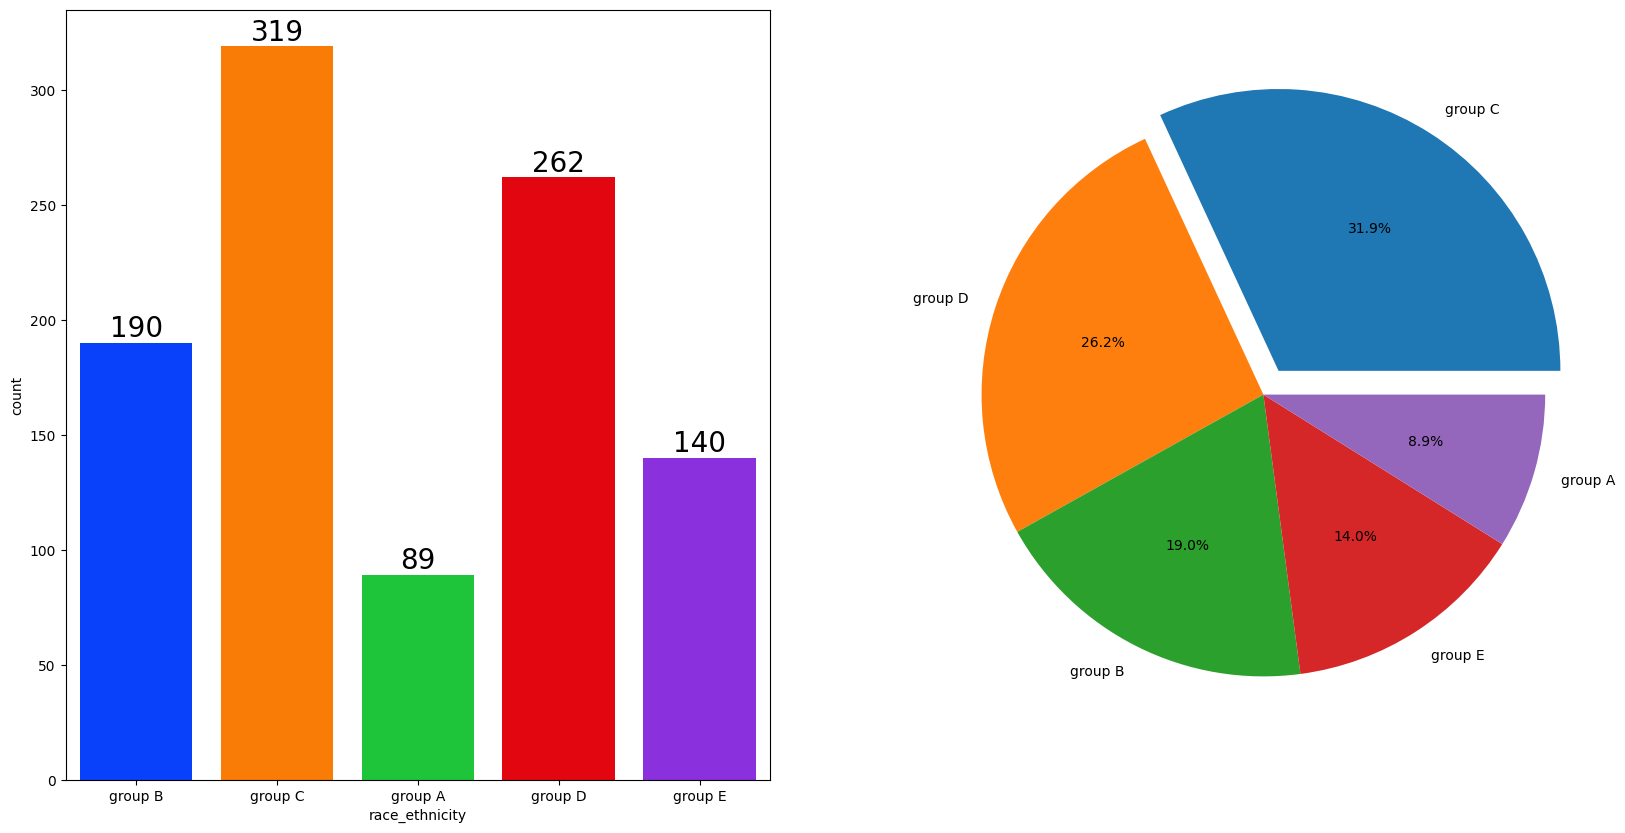

In [67]:
f, ax = plt.subplots(1, 2, figsize = (20, 10))
sns.countplot(x = df['race_ethnicity'], data = df, palette = 'bright', ax = ax[0], saturation = 0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color = 'black', size = 20)

ax[1].pie(x = df['race_ethnicity'].value_counts(), labels = df['race_ethnicity'].value_counts().index, explode = [0.1, 0, 0, 0, 0], autopct = '%1.1f%%')
plt.show()

#### Insights
1. Most of the students belonging from group C and group D
2. Lowest number of students belongs from group A.

BIVARIATE ANALYSIS(Is Race/Ethnicity has any impact on student's performance?)

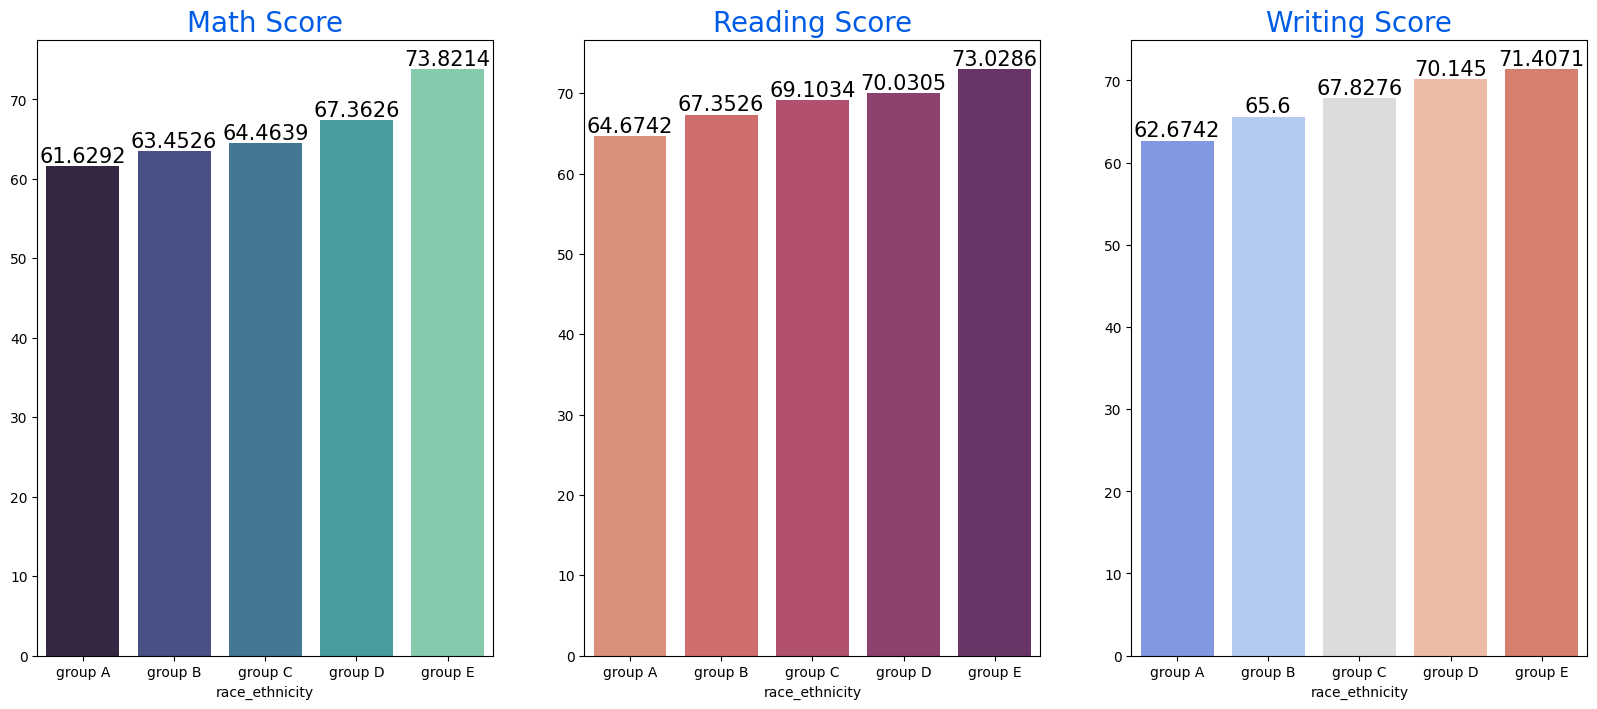

In [ ]:
group_data_re = df.groupby('race_ethnicity')
f, ax = plt.subplots(1, 3, figsize = (20, 8))
sns.barplot(x = group_data_re['math_score'].mean().index, y = group_data_re['math_score'].mean().values, palette = 'mako', ax = ax[0])
ax[0].set_title('Math Score', color = '#005ce6', size = 20)

for container in ax[0].containers:
    ax[0].bar_label(container, color = 'black', size = 15)


sns.barplot(x = group_data_re['reading_score'].mean().index, y = group_data_re['reading_score'].mean().values, palette = 'flare', ax = ax[1])
ax[1].set_title('Reading Score', color = '#005ce6', size = 20)

for container in ax[1].containers:
    ax[1].bar_label(container, color = 'black', size = 15)


sns.barplot(x = group_data_re['writing_score'].mean().index, y = group_data_re['writing_score'].mean().values, palette = 'coolwarm', ax = ax[2])
ax[2].set_title('Writing Score', color = '#005ce6', size = 20)

for container in ax[2].containers:
    ax[2].bar_label(container, color = 'black', size = 15)

#### Insights
1. Group E students hace scored the highest marks.
2. Group A students have scored the lowest marks.

### 4.4.3 Parental Level of Education
1. What is educational backgroung of student's parent?
2. Is parental education has any impact on student's performance?

UNIVARIATE ANALYSIS(What is educational backgroung of student's parent?)

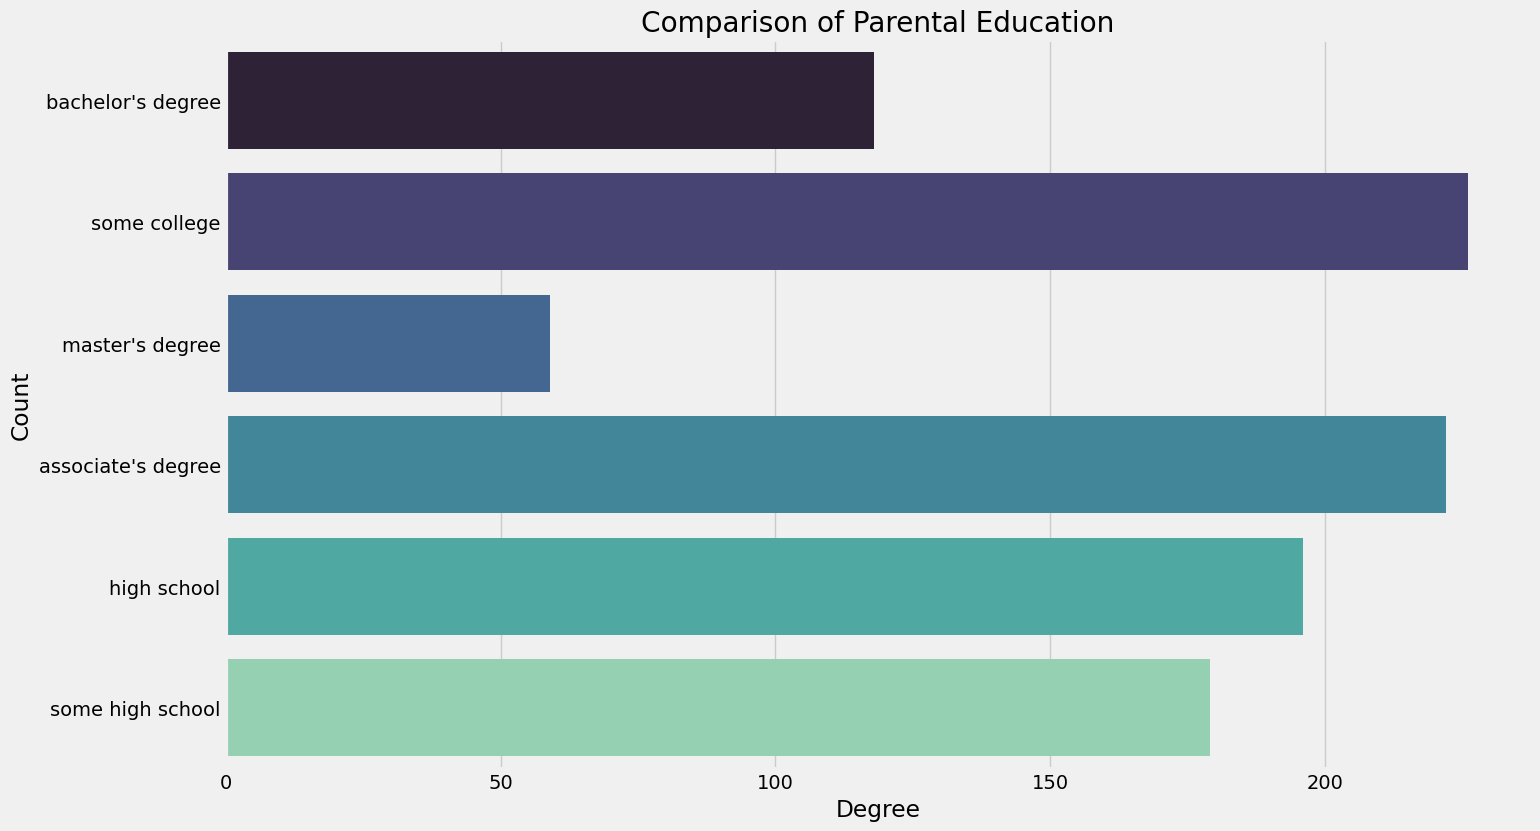

In [73]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'mako')
plt.title('Comparison of Parental Education')
plt.xlabel('Degree')
plt.ylabel('Count')
plt.show()

#### Insights
Large number of parents are from some college.

BIVARIATE ANALYSIS(Is parental education has any impact on student's performance?)

<Axes: ylabel='parental_level_of_education'>

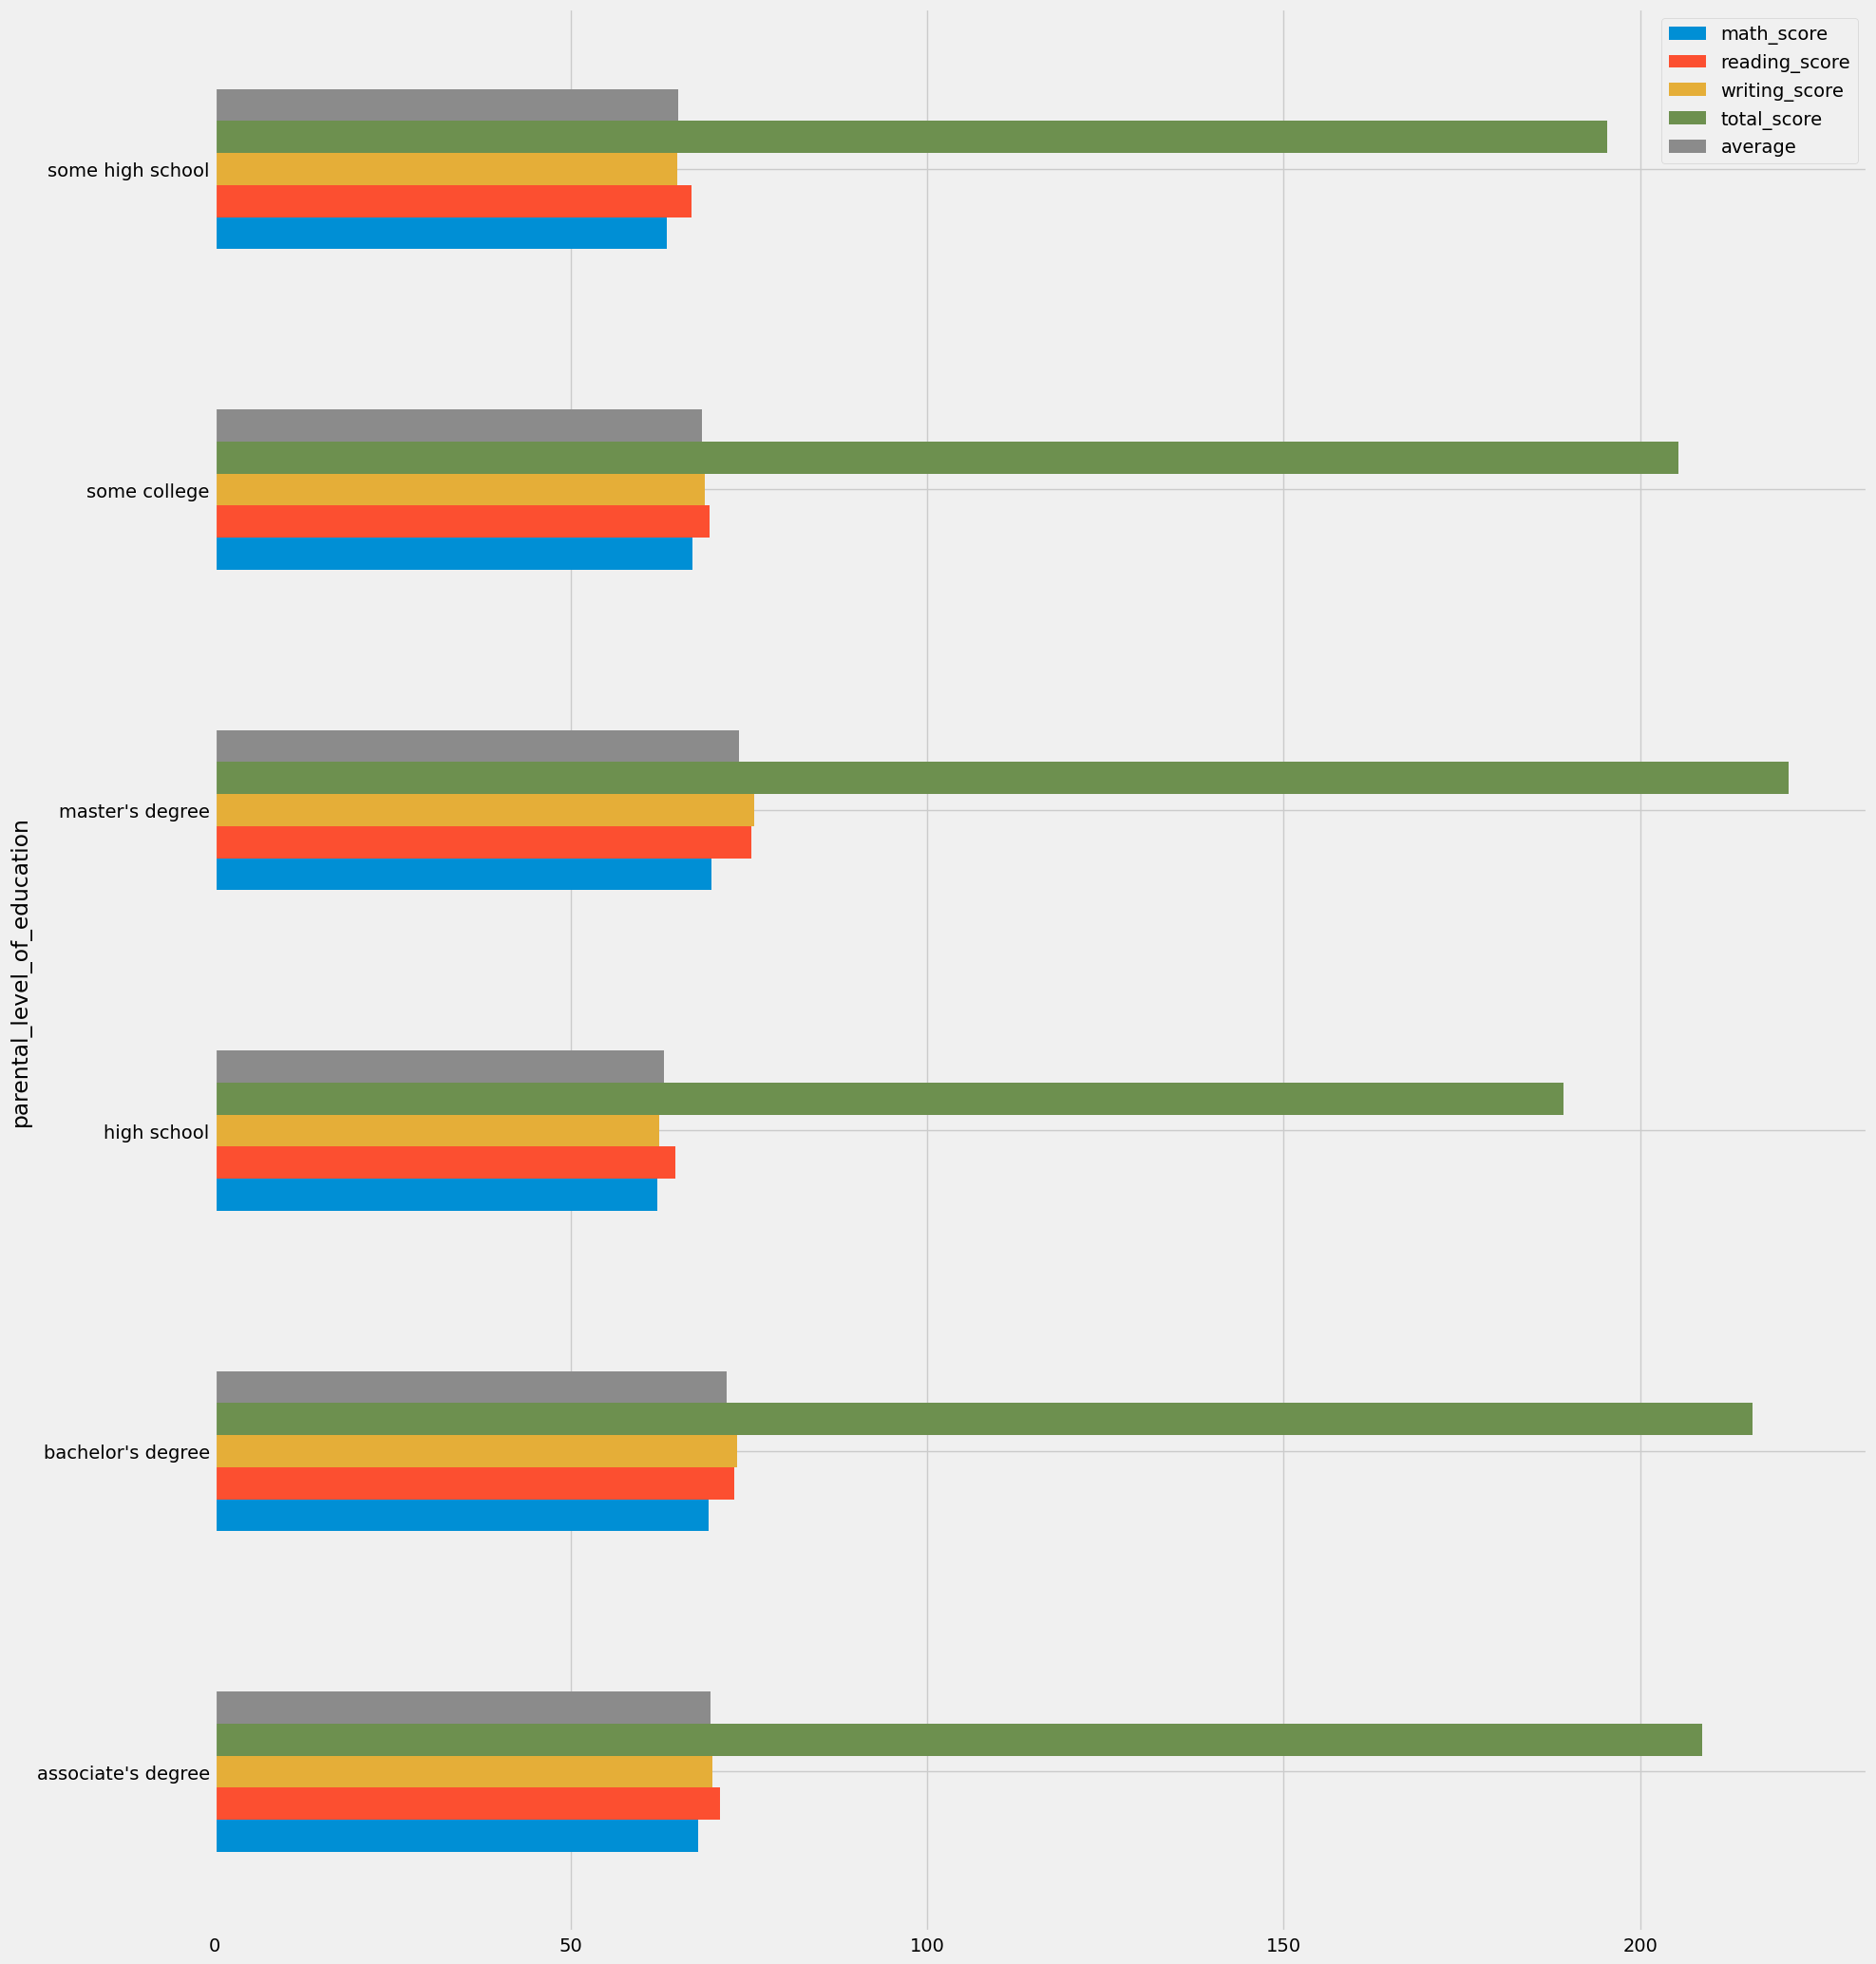

In [78]:
df.groupby('parental_level_of_education')[df.select_dtypes(include='number').columns].mean().plot(kind='barh', figsize=(20, 25))

#### Insights
The score of students whose parents posses master and bachelor level education are higher than others.

### 4.4.4 Lunch Column
1. What type of lunch is most common among students?
2. What is the effect of lunch tupe on test results?

UNIVARIATE ANALYSIS(What type of lunch is most common among students?)

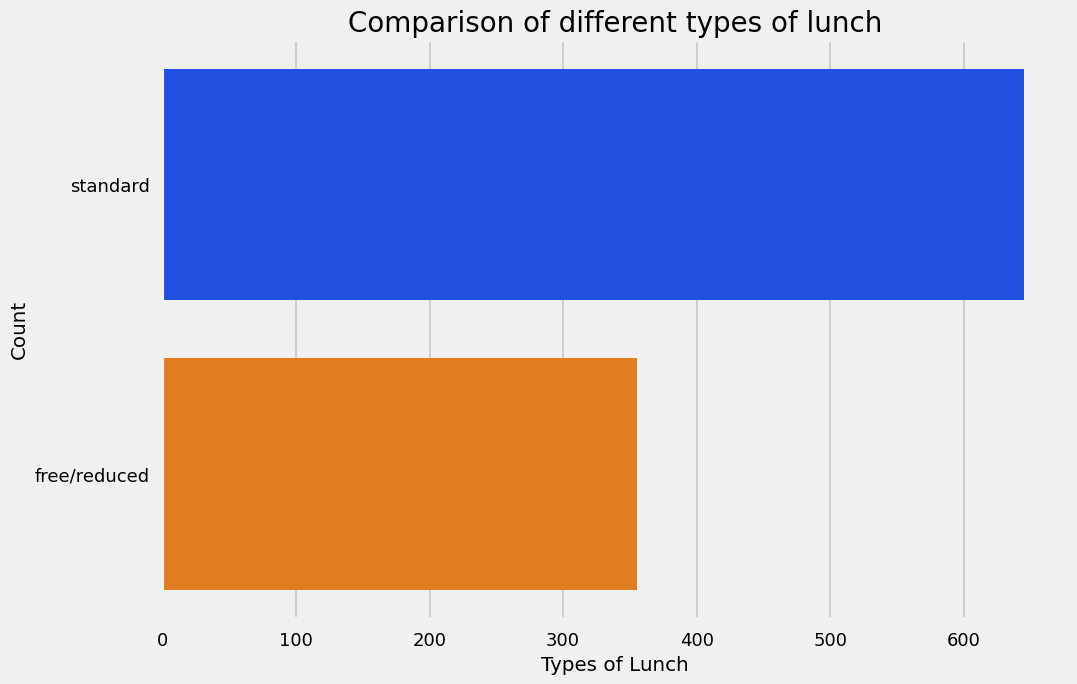

In [80]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
sns.countplot(df['lunch'], palette = 'bright')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('Types of Lunch')
plt.ylabel('Count')
plt.show()

#### Insights
Students being served Standard lunsh was more than free lunch.

BIVARIATE ANALYSIS(What is the effect of lunch type on test results?)

Text(0, 0.5, 'Type of Lunch')

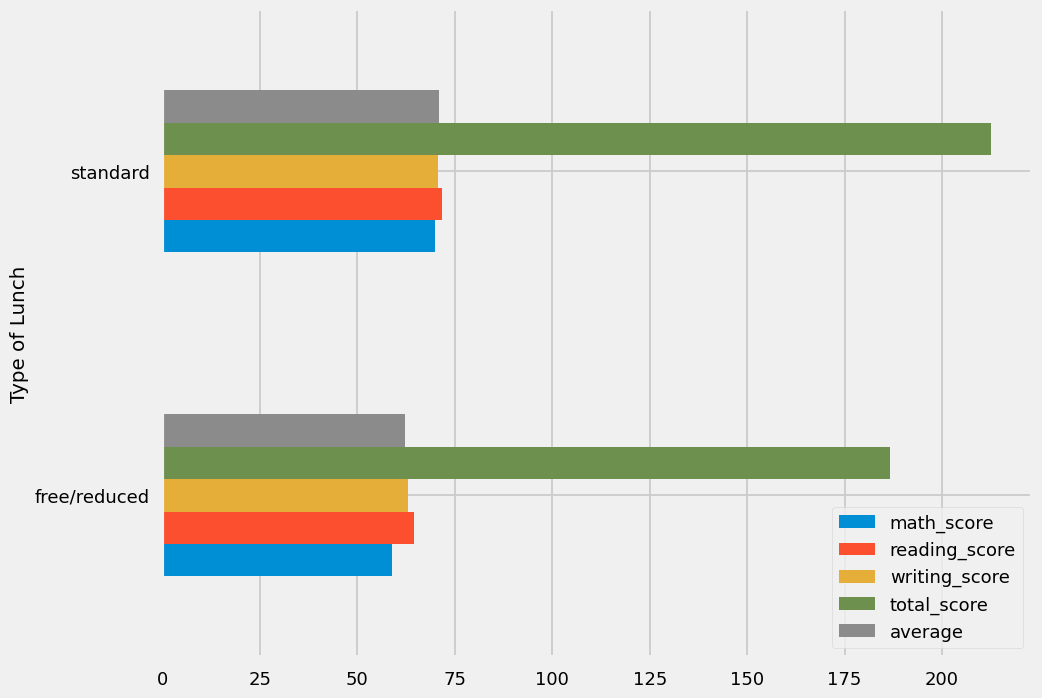

In [84]:
df.groupby('lunch')[df.select_dtypes(include='number').columns].mean().plot(kind='barh', figsize=(10, 8))
plt.ylabel('Type of Lunch')

#### Insights
Student who get Standard lunch tend to perform better than students who get free/reduced lunch.

### 4.4.5 Test Preparation Course Column
Is test preparation course has any impact on student's performance?

BIVARIATE ANALYSIS(Is test preparation course has any impact on student's performance?)

In [86]:
df.head(1)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667


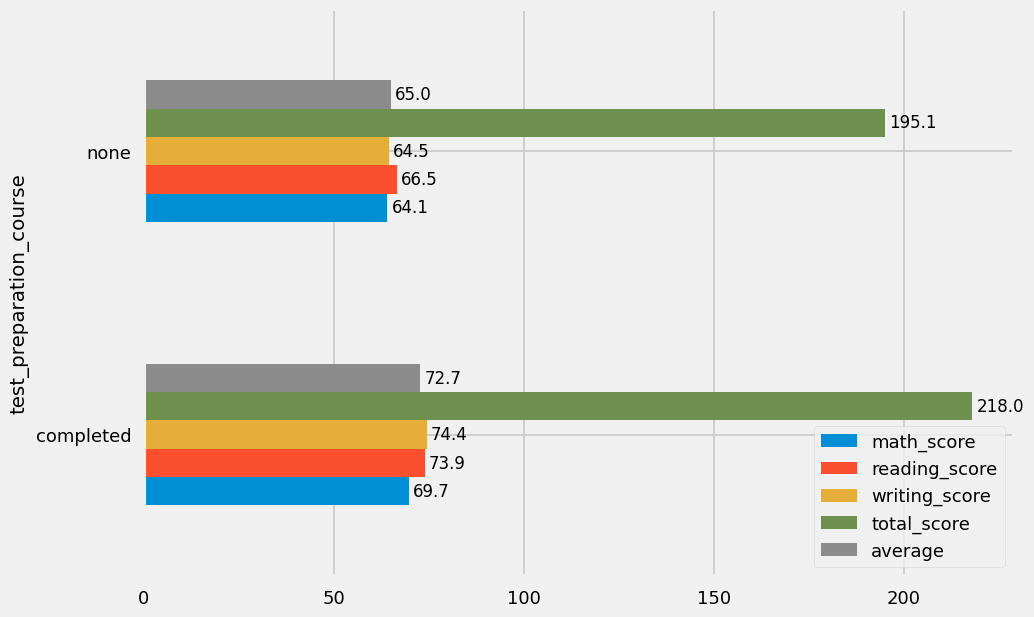

In [95]:
ax = df.groupby('test_preparation_course')[df.select_dtypes(include='number').columns].mean().plot(kind='barh', figsize=(10, 7))
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', padding=3, fontsize=12)

#### Insights
Students who have completed the Test Preparation Course have scores higher in all subjects than those who haven't taken the course. 

### 4.4.6 Chicking Outliers

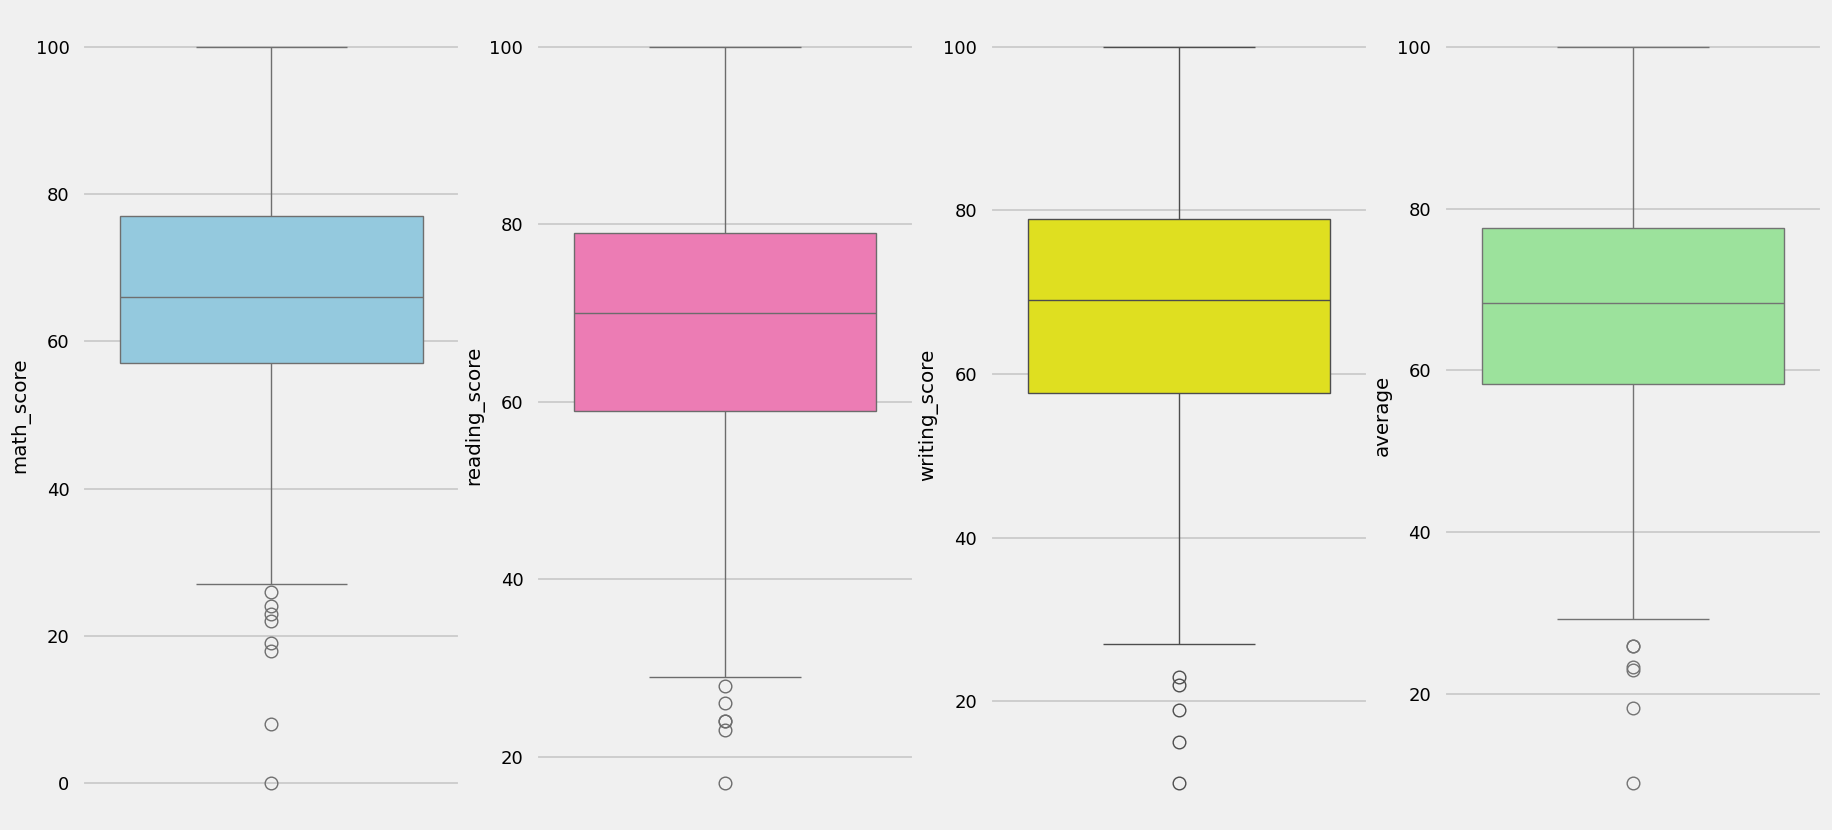

In [99]:
plt.subplots(1, 4, figsize = (20, 10))
plt.subplot(141)
sns.boxplot(df['math_score'], color = 'skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'], color = 'hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'], color = 'yellow')
plt.subplot(144)
sns.boxplot(df['average'], color = 'lightgreen')
plt.show()

### 4.4.7 Multivariant analysis using Pairplot

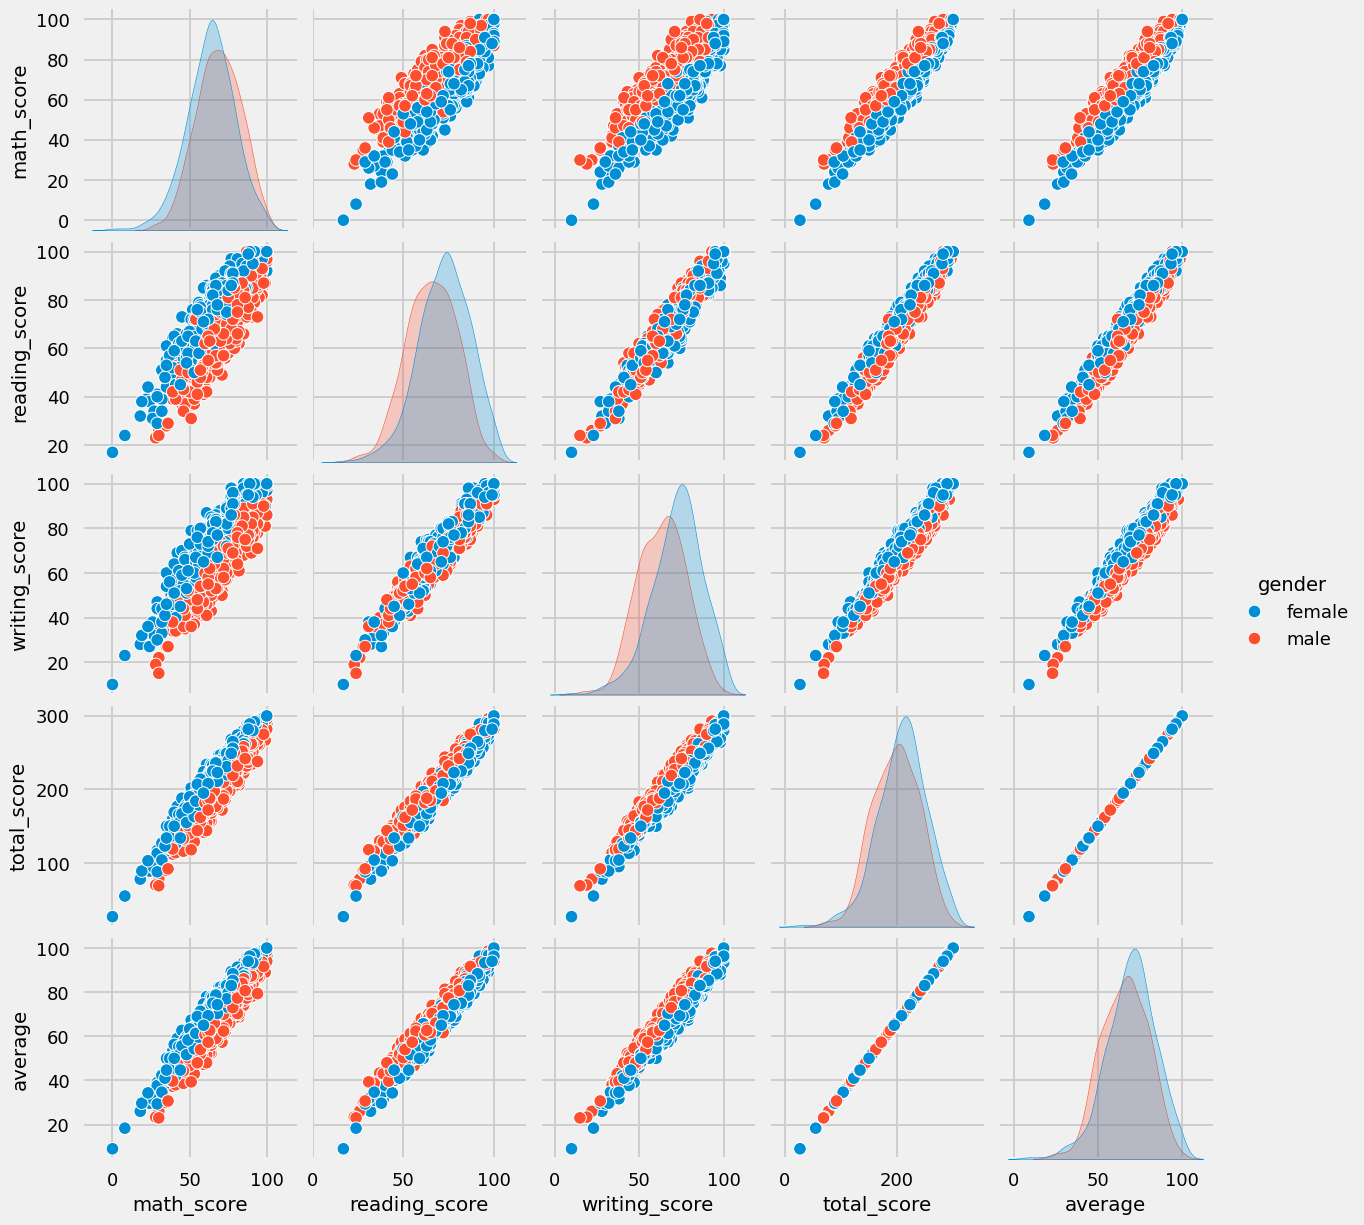

In [100]:
sns.pairplot(df, hue = 'gender')
plt.show()

### 4.4.8 Correlation between Numericals Features

<Axes: >

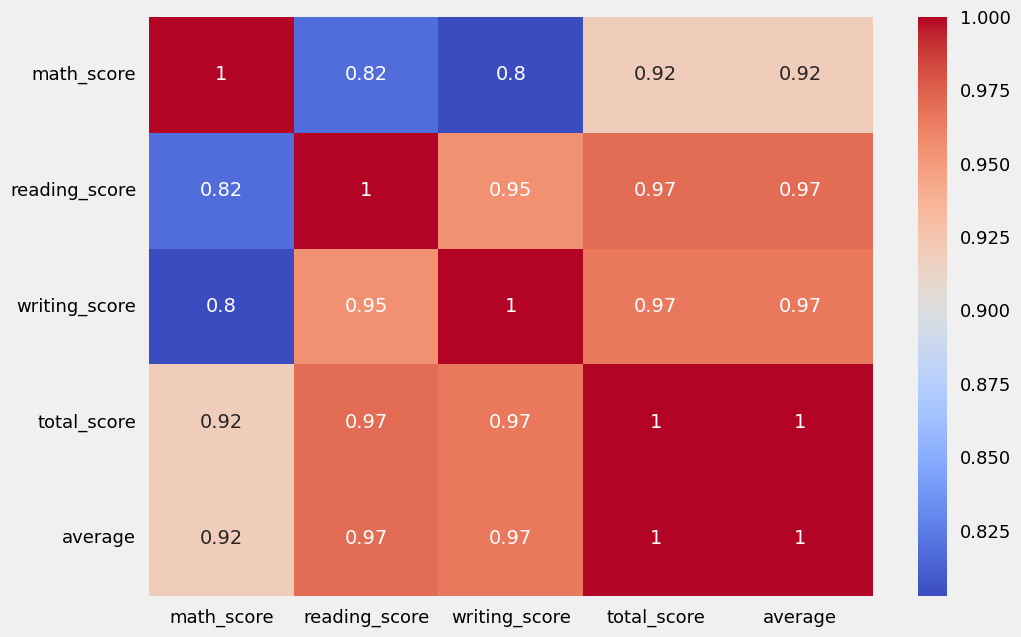

In [111]:
sns.heatmap(df.select_dtypes(include = 'number').corr(), annot = True, cmap = 'coolwarm')

## 5. Conslusion
1. Student's Performance is related with lunch, race, parental level education

2. Females lead in pass percentage and also are top-scorers.

3. Student's Performance is not much related with test preparation course

4. Finishing preparation course is benefitial.